# Homework 1

In this homework you are going to implement and test linear model fitting functions, and data quality checking functions. You will need to install (at least) python, jupyter, matplotlib, and numpy to do this assignment. Installing anaconda is a quick way to get all of those things.

There are 4 problems worth a total of 32 points. The description for each problem will tell you how many points each part is worth.

You should not need to edit the boilerplate code in this notebook, but wherever you see `## YOUR CODE HERE ##`, you should replace that with your own code (obviously).

To turn in your homework, email your finished `.ipynb` file to `huth@cs.utexas.edu`. This homework is due on 10/17.

In [1]:
# Dependencies
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1 - Data Quality (6 pts)
**Before you do anything else, _make sure your data is good_.**

In this problem you will implement a few different methods for checking data quality. You will also answer brief questions about them.

In [2]:
# Make testing data

def q_make_data(signal_size, n_repeats, n_timepoints):
    signal = np.random.randn(n_timepoints)
    data = np.random.randn(n_repeats, n_timepoints) + (signal_size ** 0.5 * signal)
    return data

q_data = q_make_data(signal_size=0.5, n_repeats=50, n_timepoints=300)

# The scenario: you've done 50 repeats of the same 300-second experiment, 
# while measuring the output of 1 neuron
# q_data is a 50 x 300 matrix with the output at each second in each of the 50 repeats
print q_data.shape

(50, 300)


### (a) - Signal to Noise Ratio (SNR) (1 pt)

Write code that computes the SNR of your measurement, `q_data`. Don't use the bias correction factor that we talked about in class.

In [3]:
def snr_func(data):
    signal_est = data.mean(0) # mean over repeats = signal estimate
    noise_est = data - signal_est # signal subtracted from original data = noise estimate
    snr_est = signal_est.var(0) / noise_est.var(1).mean()
    
    return snr_est

print('Estimated SNR:', snr_func(q_data))

('Estimated SNR:', 0.57560206132823122)


### (b) - Explainable Variance (EV) (1 pt)

Write code that computes the EV of your measurement, `q_data`. Don't use the bias correction factor that we talked about in class.

In [163]:
def ev_func(data):
    # Again, you should first compute the estimated signal and noise
    signal_est = data.mean(0)
    noise_est = data - signal_est
    ev_est = 1 - noise_est.var(1).sum() / data.var(1).sum()
    
    return ev_est

print('Estimated EV:', ev_func(q_data))

('Estimated EV:', 0.35976082585963221)


### (c) - Test how SNR and EV depend on the number of repetitions (3 pts)
Run the two following cells using the `snr_func` and `ev_func` that you defined above, then answer the questions below.

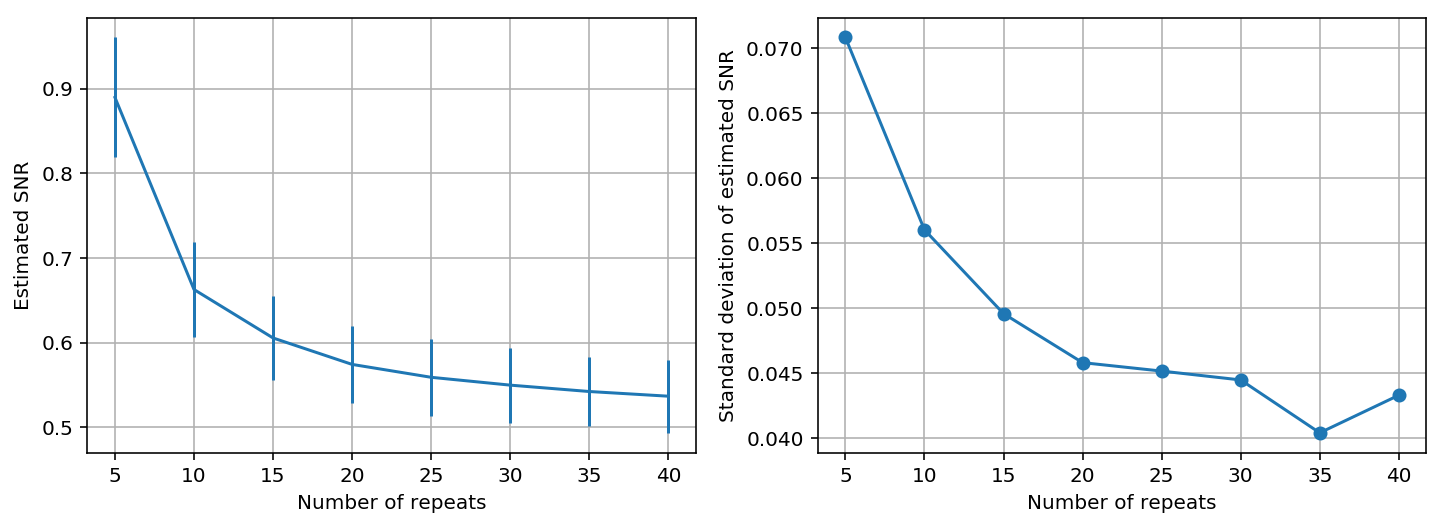

In [164]:
n_tests = 150
n_repeats = np.arange(5, 45, 5)

snr_estimates = np.array([[snr_func(q_make_data(signal_size=0.5, n_repeats=r, n_timepoints=300)) 
                           for _ in range(n_tests)] 
                          for r in n_repeats])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_repeats, snr_estimates.mean(1), yerr=snr_estimates.std(1))
plt.xlabel('Number of repeats')
plt.ylabel('Estimated SNR')
plt.grid()

plt.subplot(1,2,2)
plt.plot(n_repeats, snr_estimates.std(1), 'o-')
plt.xlabel('Number of repeats')
plt.ylabel('Standard deviation of estimated SNR')
plt.grid();

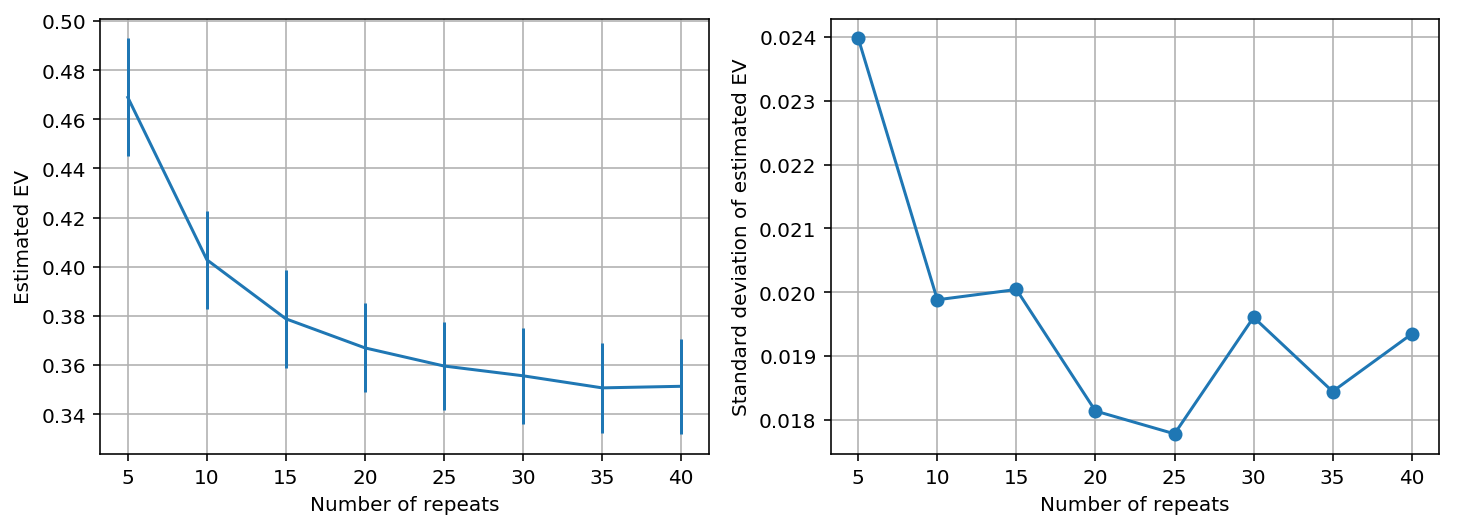

In [165]:
ev_estimates = np.array([[ev_func(q_make_data(signal_size=0.5, n_repeats=r, n_timepoints=300)) 
                          for _ in range(n_tests)] 
                         for r in n_repeats])


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_repeats, ev_estimates.mean(1), yerr=ev_estimates.std(1))
plt.xlabel('Number of repeats')
plt.ylabel('Estimated EV')
plt.grid();

plt.subplot(1,2,2)
plt.plot(n_repeats, ev_estimates.std(1), 'o-')
plt.xlabel('Number of repeats')
plt.ylabel('Standard deviation of estimated EV')
plt.grid();

### (c - continued) Questions
Please answer each question below by modifying this cell.

#### i. We know that $data = noise + \sqrt{0.5} * signal$. What would the SNR be if we had an infinite amount of data? Why? (1 pt)
_Answer here._
The SNR would be 0.5 if we had infinite data. This is because the variance of the signal is half the variance of the noise. Multiplying the signal by $\sqrt{0.5}$ halves the power.

#### ii. What would the EV be if we had an infinite amount of data? (1 pt)
_Answer here._
The EV would be 0.33 (or 1/3) if we had infinite data. EV is the proportion of the whole dataset that is signal. Since the noise is variance 1 and the signal is variance 0.5, the signal is 0.5/1.5 or 1/3 of the total variance in the dataset.

#### iii. Our estimates of SNR and EV are biased. How does the bias change as we change the number of repeats? Why? (1 pt)
_Answer here._
Both SNR and EV are overestimates, and the amount of bias depends on the number of repeats. There is a large bias when the number of repeats is small, and a smaller bias when the number of repeats is large. This happens because our estimates of the signal timecourse are poorer when the number of repeats is small.

### (d) - Test how SNR and EV depend on the number of timepoints (1 pt)
Similarly, run the two following cells using your functions, then answer the question below.

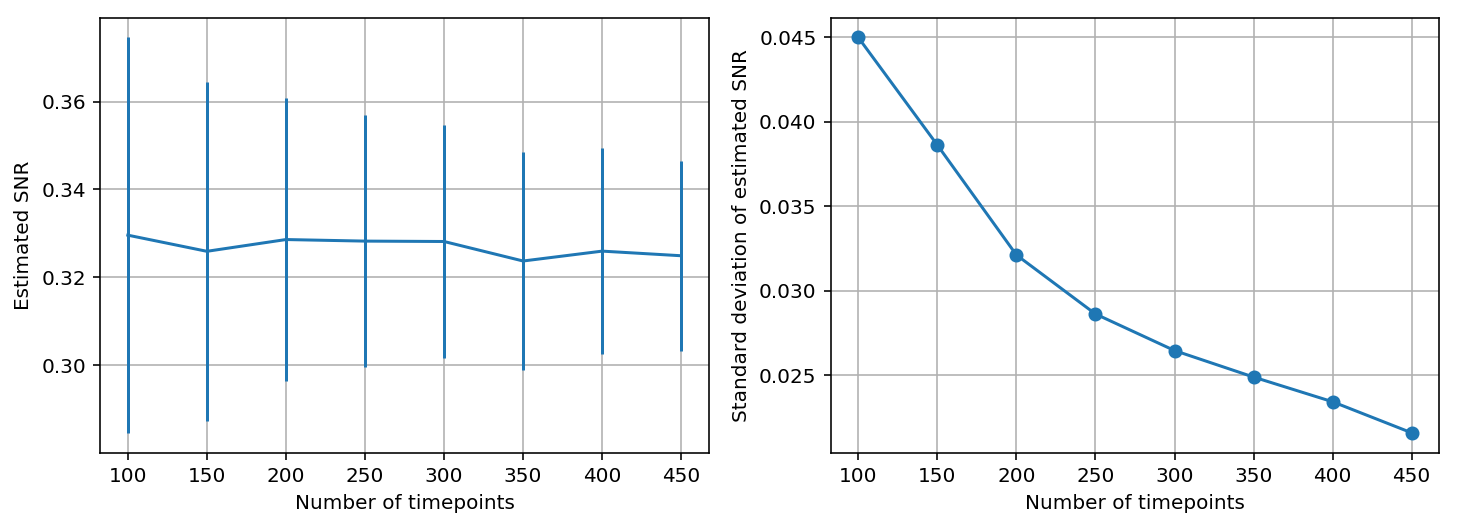

In [166]:
n_tests = 150
n_timepoints = np.arange(100, 500, 50)

snr_estimates = np.array([[snr_func(q_make_data(signal_size=0.3, n_repeats=50, n_timepoints=t)) 
                           for _ in range(n_tests)] 
                          for t in n_timepoints])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_timepoints, snr_estimates.mean(1), yerr=snr_estimates.std(1))
plt.xlabel('Number of timepoints')
plt.ylabel('Estimated SNR')
plt.grid()

plt.subplot(1,2,2)
plt.plot(n_timepoints, snr_estimates.std(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Standard deviation of estimated SNR')
plt.grid();

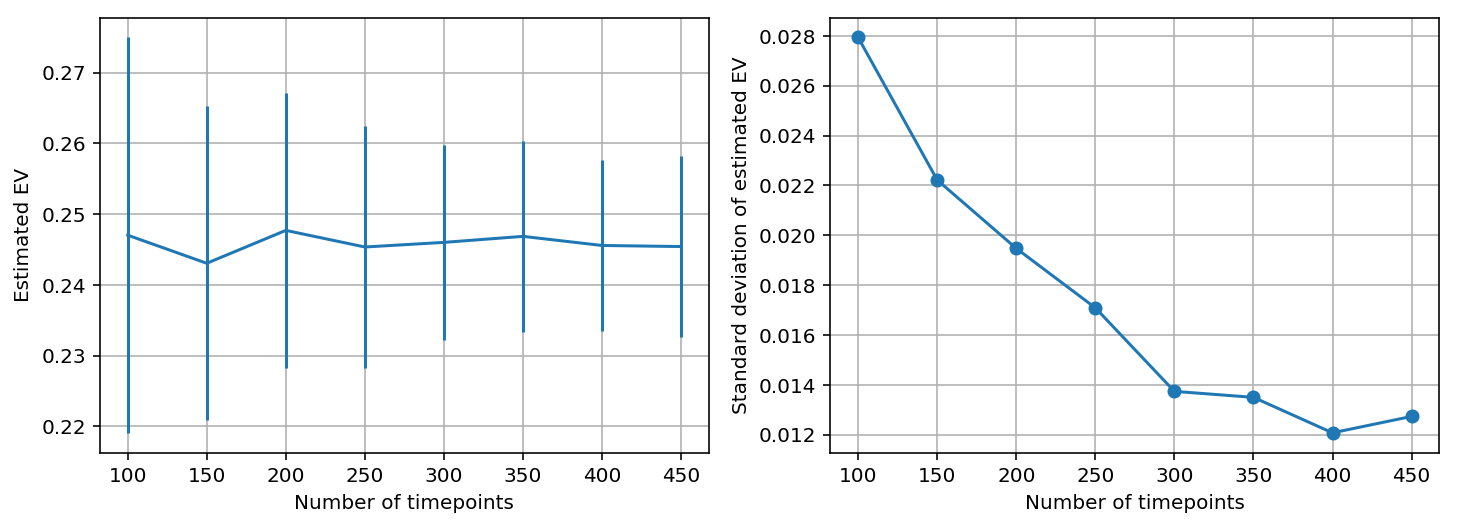

In [167]:
ev_estimates = np.array([[ev_func(q_make_data(signal_size=0.3, n_repeats=50, n_timepoints=t)) 
                          for _ in range(n_tests)] 
                         for t in n_timepoints])


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.errorbar(n_timepoints, ev_estimates.mean(1), yerr=ev_estimates.std(1))
plt.xlabel('Number of timepoints')
plt.ylabel('Estimated EV')
plt.grid();

plt.subplot(1,2,2)
plt.plot(n_timepoints, ev_estimates.std(1), 'o-')
plt.xlabel('Number of timepoints')
plt.ylabel('Standard deviation of estimated EV')
plt.grid();

### (d - continued) Question

#### i. Does changing the number of timepoints affect the bias or the variance in our estimates of SNR and EV? (1 pt)
_Answer here._
Changing the number of timepoints only affects the variance, not the bias.

### (Bonus) (+3 pts)
Suppose you have enough time to collect 15,000 total datapoints, but you can choose whether you want to collect a lot of repetitions with a short experiment, or a few repetitions with a long experiment. Let's also suppose that the shortest experiment you can do would be 10 timepoints long. How would you set `n_repeats` and `n_timepoints` to get the best estimate of SNR or EV? And how would you define _best_?

In [169]:
# Insert code for answering the bonus question here, if you want!

## Problem 2 - Gradient Descent (12 pts)

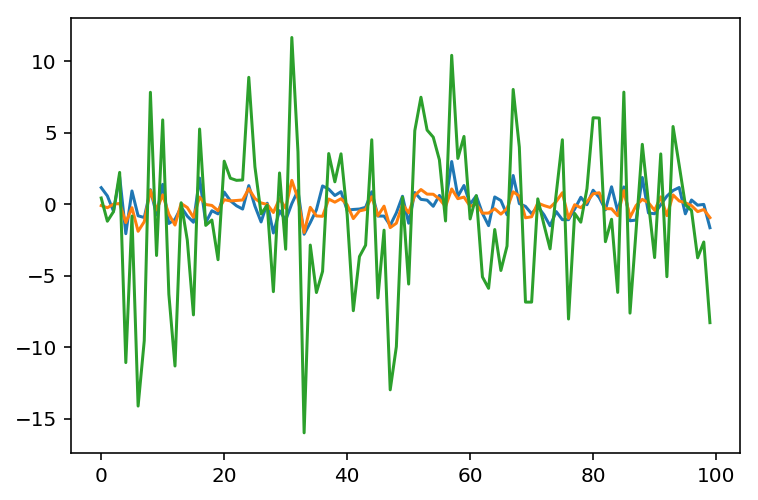

In [374]:
# Make testing data

def gd_make_data(nsamp=100, noise=0):    
    # Generate a two dimensional stimulus (e.g two pixels) with correlations and 100 samples (e.g. points in time)
    # First pixel data
    x1 = np.random.randn(nsamp)

    # Second pixel that is correlated with the first
    x2 = .4 * x1 + .6 * np.random.randn(nsamp)

    # Concatinate into a stimulus matrix - here rows are dimensions and columns are time points.
    x = np.vstack([x1, x2])

    ## Generate weights and the corresponding one dimensional response 
    # Set weights on each channel
    b = np.array([1, 7])

    # Make response of system - this is the output of our toy neuron
    y = np.dot(x.T, b) + np.random.randn(nsamp) * noise
    
    return x, y

x, y = gd_make_data()

# Plot timeseries
plt.plot(x[0])
plt.plot(x[1])
plt.plot(y);

In [375]:
# We are going to pretend we don't know h and make a search for h values by settting up 
# a range of potential values for h1 and h2

b1, b2 = np.meshgrid(np.arange(-1, 10, .2), np.arange(-1, 10, .2))
bs = np.vstack([b1.ravel(), b2.ravel()])

# get responses from each set of weights
ys = np.dot(x.T, bs)

# calculate error between the response, y, and each of the possible responses, ys.  
errfun = np.sum((y[:,None] - ys) ** 2, 0)

# reshape for plotting
errfun = errfun.reshape(b1.shape)

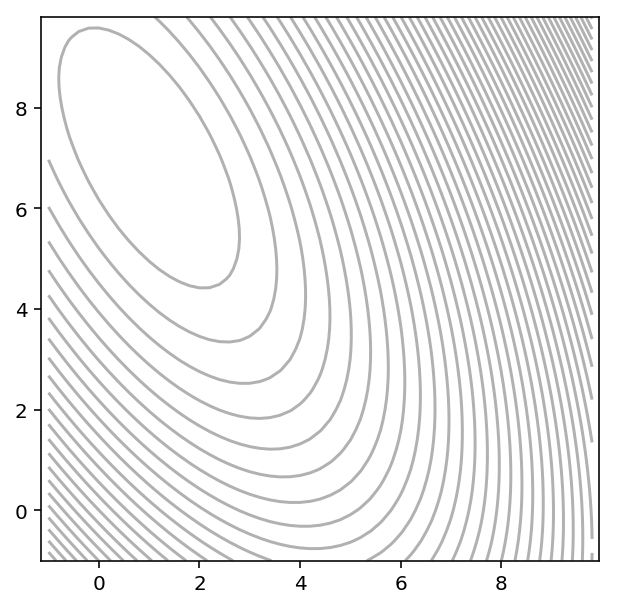

In [376]:
## plot contour of error surface. Note the shape of the surface is angled
# because the two variable are correlated.
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3);
plt.axis('equal');

### (a) Gradient Descent (3 pts)
Write code that uses gradient descent to solve this problem. Store the estimated betas after each gradient step, and then plot the results on top of the error contours.

In [ ]:
# Gradient descent!

steps = 100 # how many steps to take
eps = 0.001 # the size of each step

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])
for ii in range(steps):
    err = y - x.T.dot(b_est)
    step = eps * x.dot(err)
    b_est += step
    b_est_history[ii+1] = b_est

    if not ii % 10:
        print(ii, (err ** 2).mean())

## plot contour of error surface and your regression path
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
plt.plot(b_est_history[:,0], b_est_history[:,1], 'b.-');
plt.axis('equal');

### (b) Coordinate Descent (3 pts)

('Step:', 0, 'Error:', 30.020129209931373)
('Step:', 10, 'Error:', 11.425025107790532)
('Step:', 20, 'Error:', 4.3715692206676131)
('Step:', 30, 'Error:', 1.6650609075997103)
('Step:', 40, 'Error:', 0.6362410862904917)
('Step:', 50, 'Error:', 0.24332583239278238)
('Step:', 60, 'Error:', 0.092822855514652011)
('Step:', 70, 'Error:', 0.035438976747889928)
('Step:', 80, 'Error:', 0.013547740375452089)
('Step:', 90, 'Error:', 0.0051835474811716105)


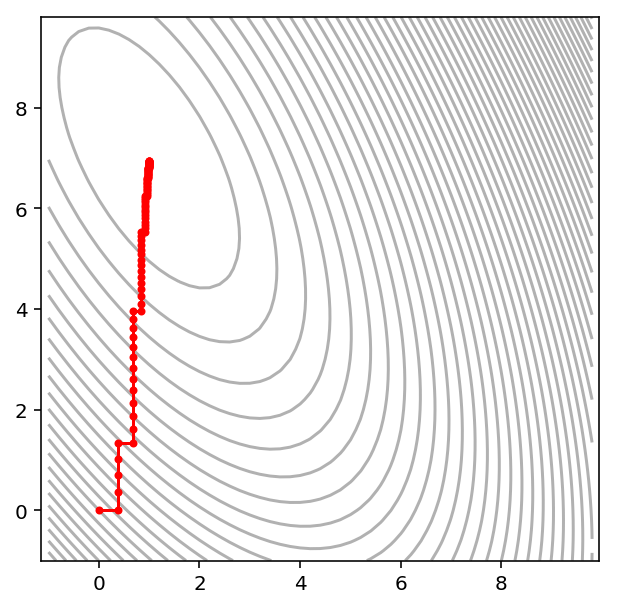

In [378]:
# Coordinate descent!
steps = 100 # how many steps to take
eps = 0.001 # the size of each step

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])
for ii in range(steps):
    err = y - x.T.dot(b_est)
    step = eps * x.dot(err)

    # only step along the direction with the biggest change
    largest_idx = np.abs(step).argmax()
    step[step != step[largest_idx]] = 0

    b_est += step

    b_est_history[ii+1] = b_est

    if not ii % 10:
        print('Step:', ii, 'Error:', (err ** 2).mean())

## plot contour of error surface and your regression path
plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
plt.plot(b_est_history[:,0], b_est_history[:,1], 'r.-');
plt.axis('equal');


### (c) Gradient descent with early stopping (3 pts)

In [451]:
#trnx, trny = gd_make_data(25, noise=20)
#valx, valy = gd_make_data(5, noise=0)
#np.savez('gd-heldout.npz', trnx=trnx, trny=trny, valx=valx, valy=valy)

In [452]:
heldout_data = np.load('gd-heldout.npz')
trnx = heldout_data['trnx']
trny = heldout_data['trny']
valx = heldout_data['valx']
valy = heldout_data['valy']

(0, 438.61131931893078)
(10, 407.07309399072562)
(20, 388.40659777681793)
(30, 376.23112419487705)
(40, 367.5235739590629)
(50, 360.82398498991597)
(60, 355.40381768264638)
(70, 350.87997733119215)
(80, 347.03526836163456)
(90, 343.73450786026842)
('Best step in held-out set:', 42, 'Weights:', array([ 2.10722612,  5.51504083]))
('Where gradient descent ended up:', array([ 1.30659952,  9.65440633]))


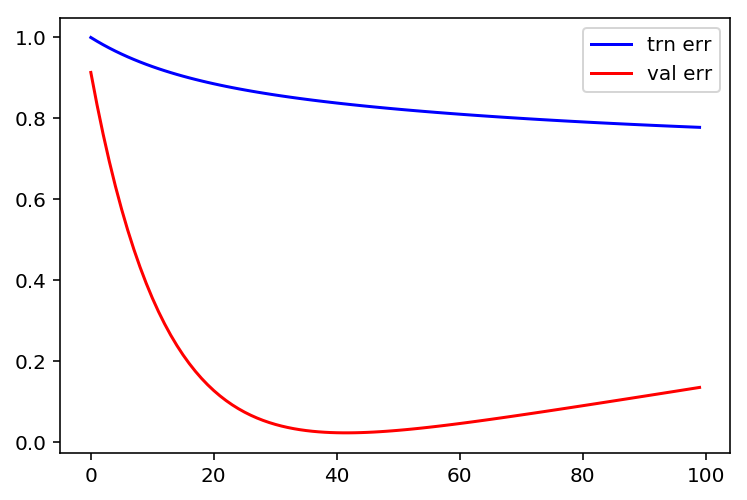

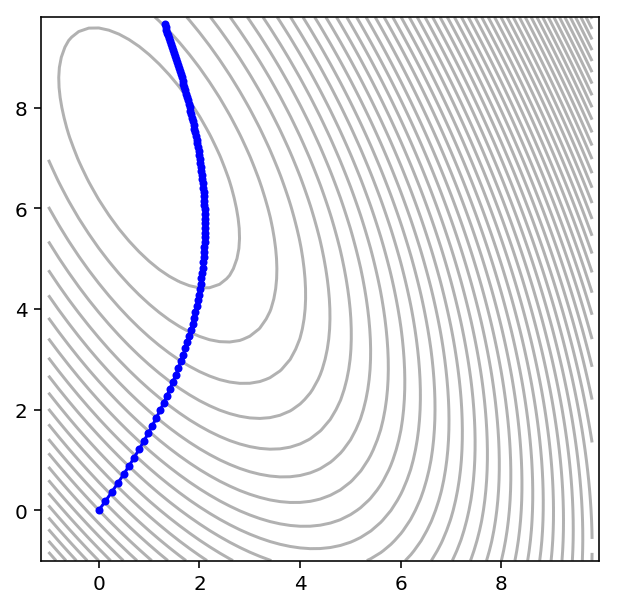

In [457]:
# Gradient descent!

steps = 100
eps = 0.001

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])
trn_err_history = np.zeros([steps])
val_err_history = np.zeros([steps])

for ii in range(steps):
    err = trny - trnx.T.dot(b_est)
    step = eps * trnx.dot(err)
    b_est += step
    b_est_history[ii+1] = b_est
    
    trn_err_history[ii] = (err ** 2).mean() / (trny**2).mean()
    val_err_history[ii] = ((valy - valx.T.dot(b_est))**2).mean() / (valy**2).mean()

    if not ii % 10:
        print(ii, (err ** 2).mean())

plt.plot(trn_err_history, 'b-', label='trn err')
plt.plot(val_err_history, 'r-', label='val err');
plt.legend();

print('Best step in held-out set:', val_err_history.argmin(), 'Weights:', b_est_history[val_err_history.argmin()])
print('Where gradient descent ended up:', b_est_history[-1])

plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
plt.plot(b_est_history[:,0], b_est_history[:,1], 'b.-');
plt.axis('equal');

### (c) Coordinate descent with early stopping (3 pts)

(0, 438.61131931893078)
(10, 414.50540066138296)
(20, 395.52166139618731)
(30, 380.57170816650245)
(40, 368.79841637990876)
(50, 359.526788745847)
(60, 352.22525570454565)
(70, 346.47519898771213)
(80, 341.94695100748936)
(90, 338.38089404837069)
('Best step in held-out set:', 63)
[ 0.          8.17290425]
[  0.          10.77434143]


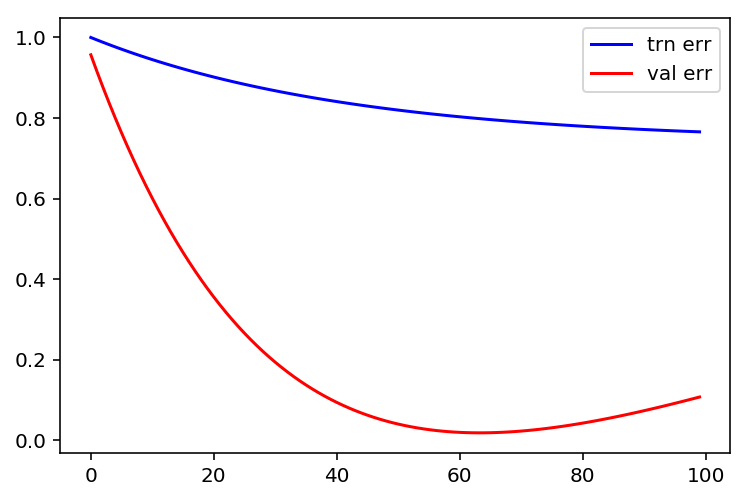

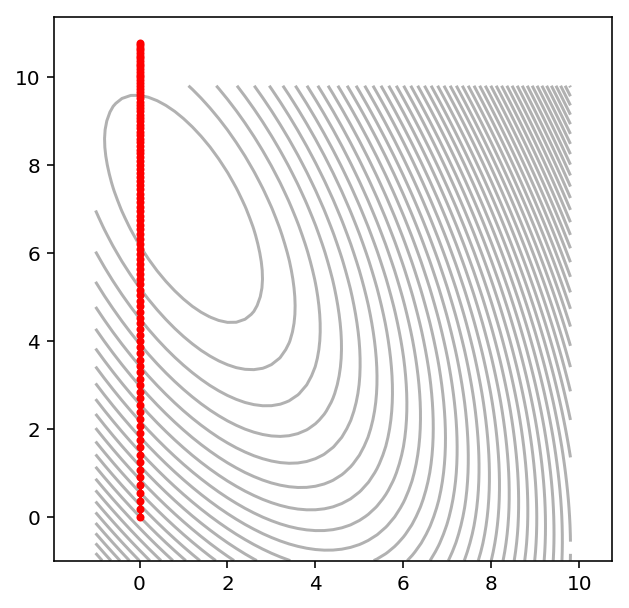

In [454]:
# Coordinate descent!

steps = 100
eps = 0.001

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros([steps+1, 2])
trn_err_history = np.zeros([steps])
val_err_history = np.zeros([steps])

for ii in range(steps):
    err = trny - trnx.T.dot(b_est)
    step = eps * trnx.dot(err)
    
    # only step along the direction with the biggest change
    largest_idx = np.abs(step).argmax()
    step[step != step[largest_idx]] = 0
    
    b_est += step
    b_est_history[ii+1] = b_est
    
    trn_err_history[ii] = (err ** 2).mean() / (trny**2).mean()
    val_err_history[ii] = ((valy - valx.T.dot(b_est))**2).mean() / (valy**2).mean()

    if not ii % 10:
        print(ii, (err ** 2).mean())

plt.plot(trn_err_history, 'b-', label='trn err')
plt.plot(val_err_history, 'r-', label='val err');
plt.legend();

print('Best step in held-out set:', val_err_history.argmin())
print(b_est_history[val_err_history.argmin()])
print(b_est_history[-1])

plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
plt.plot(b_est_history[:,0], b_est_history[:,1], 'r.-');
plt.axis('equal');


## Problem 3 - Regression: ordinary least squares (OLS) and ridge on a small problem (6 pts)

### (a) Solve the (noiseless) 2-feature problem with OLS. (2 pts)
Then plot the solution on top of an error contour plot.

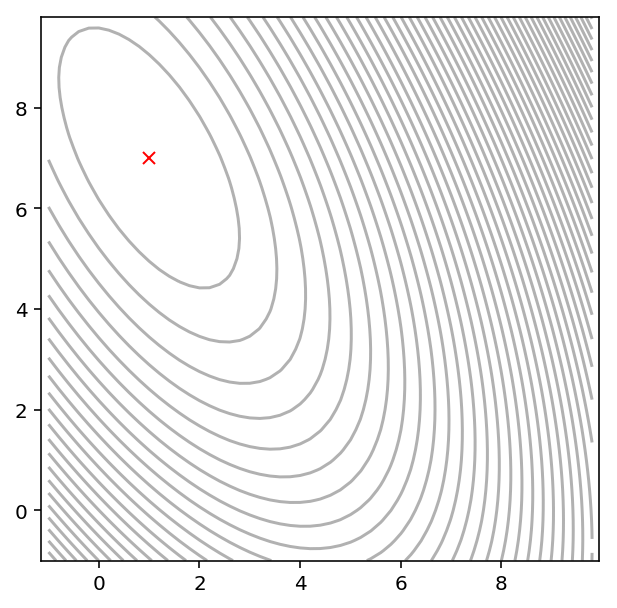

In [460]:
beta_ols = np.linalg.inv(x.dot(x.T)).dot(x).dot(y)

plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
#plt.plot(b_est_history[:,0], b_est_history[:,1], 'r.-');
plt.plot(beta_ols[0], beta_ols[1], 'rx')
plt.axis('equal');

### (b) Solve the (noiseless) 2-feature problem with ridge (4 pts)
Solve the regression problem using features `x` and responses `y` using ridge. Test the different ridge regularization coefficients (lambdas) given here. For each lambda, store the betas that you find. Then plot the resulting beta path on top of an error contour plot.

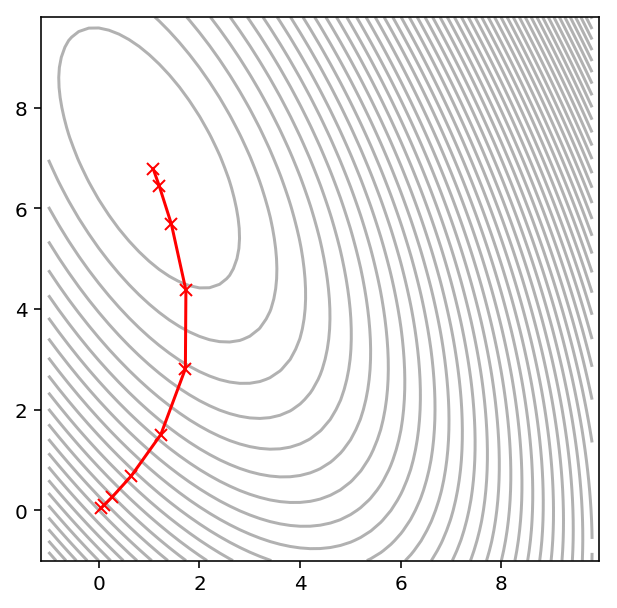

In [475]:
lambdas = np.logspace(0, 4, 10)
betas_ridge = np.zeros((len(lambdas), 2))
for ii in range(len(lambdas)):
    betas_ridge[ii] = np.linalg.inv(x.dot(x.T) + lambdas[ii] * np.eye(2)).dot(x).dot(y)

plt.figure(figsize=(5,5))
plt.contour(b1, b2, errfun, 50, colors='k', alpha=0.3)
plt.plot(betas_ridge[:,0], betas_ridge[:,1], 'rx-')
#plt.plot(b_est_history[:,0], b_est_history[:,1], 'b.-');
plt.axis('equal');

## Problem 4 - Regression on a high-dimensional problem (8 pts)
Next let's try doing regression on a problem with lots of features, and noise as well!

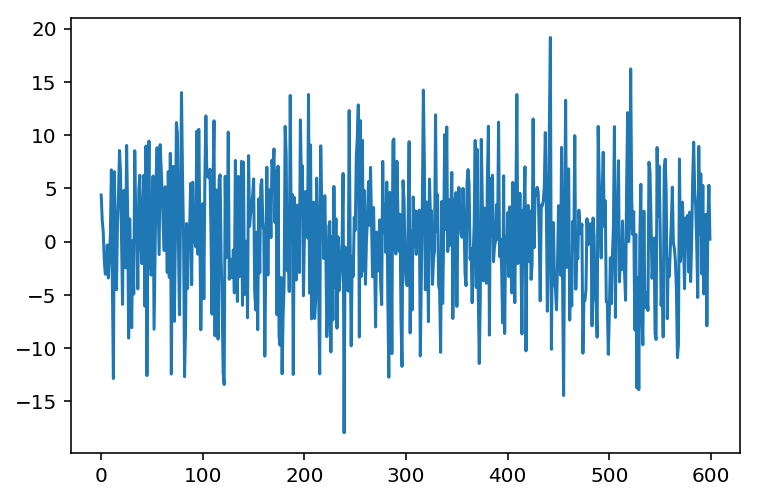

In [625]:
# Generate high-dimensional data

n_features = 400 # the number of features
n_timepoints = 600 # the number of timepoints
n_training = 450 # the number of timepoints that we'll use for training
noise_level = 5.0 # how much noise to add

# generate the "true" betas, the ones that will be used to generate the data
beta_true = np.random.randn(n_features)

# generate the feature matrix, x
# this uses a trick to make the different features in x be pretty correlated
u,s,vh = np.linalg.svd(np.random.randn(n_timepoints, n_features), full_matrices=False)
x_all = (u*(s**5)).dot(vh)
x_all /= x_all.max()

# generate the responses, y = x . beta + noise
y_all = x_all.dot(beta_true) + np.random.randn(n_timepoints) * noise_level

# split x and y into training part (first n_training timepoints) ..
x = x_all[:n_training]
y = y_all[:n_training]

# .. and validation part (remaining timepoints)
x_val = x_all[n_training:]
y_val = y_all[n_training:]

# plot y, let's see what it looks like
plt.plot(y_all);

### (a) How well could we possibly do at this problem? (3 pts)

#### i. Define a function to compute the mean squared error (MSE) between a signal $z$ and its estimate $\hat{z}$ (1 pt) 

In [613]:
def mean_squared_error(z, z_hat):
    return ((z - z_hat)**2).mean()

#### ii. What is the minimum possible MSE on the training set and on the validation set? (1 pt)

In [616]:
best_trn_mse = mean_squared_error(y, x.dot(beta_true))
best_val_mse = mean_squared_error(x_val.dot(beta_true), y_val)

print('Best possible MSE on training set:')
print(best_trn_mse)

print('Best possible MSE on validation set:')
print(best_val_mse)


Best possible MSE on training set:
25.960637134
Best possible MSE on validation set:
26.3968646315


#### iii. What would MSE be on the training and validation sets if all $\beta=0$? (1 pt)

In [619]:
betazero_trn_mse = mean_squared_error(y, 0)
betazero_val_mse = mean_squared_error(y_val, 0)

print('MSE on training set with beta=0:')
print(betazero_trn_mse)

print('MSE on validation set with beta=0:')
print(betazero_val_mse)

MSE on training set with beta=0:
51.5353440949
MSE on validation set with beta=0:
47.7746521444


### (b) Solve the high-dimensional problem with OLS (1 pt)

In [622]:
beta_ols = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

y_hat = x.dot(beta_ols)
y_val_hat = x_val.dot(beta_ols)

print('Training MSE:', mean_squared_error(y, y_hat))

print('Validation MSE:', mean_squared_error(y_val, y_val_hat))

('Training MSE:', 3.6957519589756758)
('Validation MSE:', 178.76509169586075)


Wow! If you did this right, the training error is _way_ better than the minimum possible. That is truly incredible. Unbelievable. Literally. And the validation error is much worse than what you would get from just guessing that $\beta=0$. Surely there must be some solution.

### (b) Solve high-dimensional problem with ridge (5 pts)

#### i. Solve the regression problem $y = x \beta$ using ridge regression. Try the different ridge coefficients (lambdas) as given here. For each lambda, store the MSE on the training dataset, the MSE on the validation dataset, and the betas. (2 pts)
Note that the features (x) in this problem are organized differently than they were in the previous problem (transpose).

In [626]:
lambdas = np.logspace(-3, 5, 10)
betas_ridge = np.zeros((len(lambdas), n_features))
trn_mse = np.zeros(len(lambdas))
val_mse = np.zeros(len(lambdas))

for ii in range(len(lambdas)):
    beta_ridge = np.linalg.inv(x.T.dot(x) + lambdas[ii] * np.eye(n_features)).dot(x.T).dot(y)
    betas_ridge[ii] = beta_ridge
    
    y_hat = x.dot(beta_ridge)
    y_val_hat = x_val.dot(beta_ridge)
    
    trn_mse[ii] = mean_squared_error(y, y_hat)
    val_mse[ii] = mean_squared_error(y_val, y_val_hat)

#### ii. Plot the training MSE and validation MSE as a function of lambda. Plot horizontal lines that show the theoretical minimum and maximum MSE (i.e. when beta=0) on the validation set, which you computed above. Explain what you see. (2 pts)

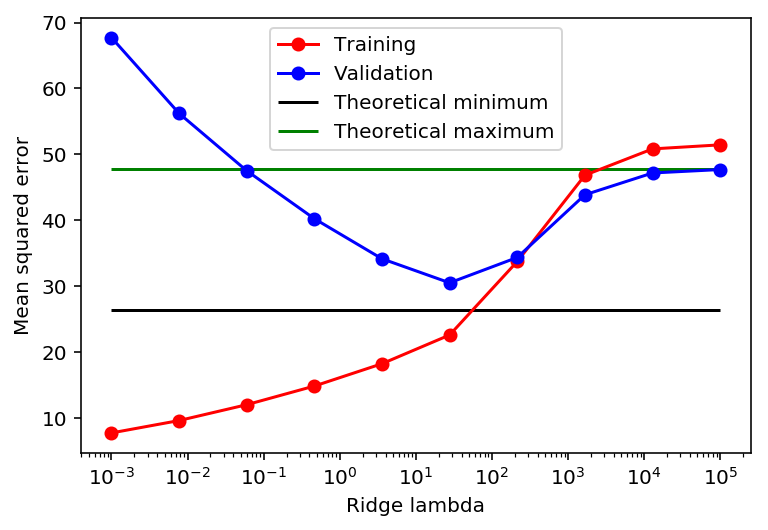

In [624]:
plt.semilogx(lambdas, trn_mse, 'ro-', label="Training")
plt.semilogx(lambdas, val_mse, 'bo-', label="Validation")
plt.hlines(best_val_mse, lambdas[0], lambdas[-1], label="Theoretical minimum")
plt.hlines(betazero_val_mse, lambdas[0], lambdas[-1], label="Theoretical maximum", color='g')
plt.legend()
plt.ylabel('Mean squared error')
plt.xlabel('Ridge lambda');

_Explanation here._
At very high lambda, the validation MSE approaches its value for when beta=0. At very low lambda, the validation MSE exceeds that maximum by quite a bit, suggesting the model is very wrong. The best MSE is found somewhere in between.

#### iii. For each feature, plot its weight (beta) as a function of lambda. Put all of these on the same plot. Explain what you see. (1 pt)

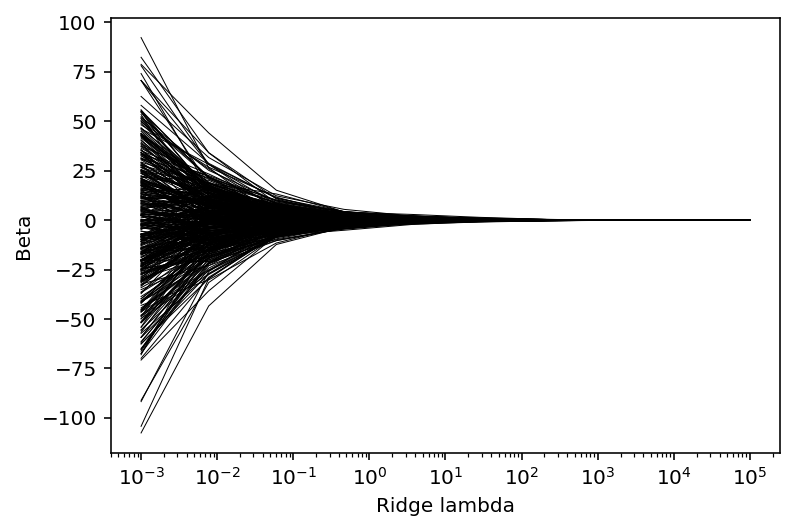

In [632]:
plt.semilogx(lambdas, betas_ridge, 'k-', lw=0.5)
plt.ylabel('Beta')
plt.xlabel('Ridge lambda');

_Explanation here._
All of the betas shrink towards zero as lambda increases.